## Jump Game 2

In [2]:
# Jump Game 2
from typing import List

def jump(nums: List[int]) -> int:

    """
    :type nums: List[int]
    :rtype: int
    """
    
    n = len(nums)
    if n <= 1:
        return 0

    jumps = 0
    current_jump_end = 0
    farthest = 0

    for i in range(n - 1):
        farthest = max(farthest, i + nums[i])
        print("i", i)
        print(farthest)

        # If you have explored up to the current end of the jump, meaning that you already have determined where
        # is the farthese you can go from this point.
        if i == current_jump_end:
            # print(current_jump_end)
            jumps += 1
            current_jump_end = farthest

    return jumps

# Solution
def jump(self, nums: List[int]) -> int:
    l, r = 0, 0
    res = 0
    while r < (len(nums) - 1):
        maxJump = 0
        for i in range(l, r + 1):
            maxJump = max(maxJump, i + nums[i])
        l = r + 1
        r = maxJump
        res += 1
    return res

In [3]:
# case 1
nums = [2,3,1,1,4]
jump(nums = nums)

TypeError: jump() missing 1 required positional argument: 'self'

In [ ]:
'''
Conclusion. The solution is a greedy problem, for every value up to the maximum reach of the current jump range,
You record where is the next farthest place you can go, and then take a step from the previous spot, and keep checking.
'''

In [16]:
# Redo of the problem without seeing the solution:
def jump(nums: List[int]) -> int:

    # edge case:
    n = len(nums)
    if n == 1:
        return 0

    # Initialize some tools

    jumps = 0
    current_jumping_end = 0
    farthest = 0

    # Iterating through the jump
    for i in range (n-1):

        # check if this step will take you farther than you did before
        farthest = max(farthest, i + nums[i])

        # if you've reached the end of the current jumping end, that means that you've taken a jump, take into account of it right here.
        if i == current_jumping_end:
            jumps += 1
            current_jumping_end = farthest # The next time you'll check for a jump is when 

    return jumps


In [17]:
nums = [2,3,1,1,4]
jump(nums = nums)

2

## Maximum Area of Island (Not attempted)

In [ ]:
# Beats 99.64%

def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
    # Dimensions of the grid
    ROWS, COLS = len(grid), len(grid[0])

    # Initialize the maximum area of an island found so far
    max_area = 0

    # Depth-First Search (DFS) function to calculate the area of an island
    def dfs(r, c):
        # Return 0 if out of bounds or at a water cell (0)
        if r < 0 or r >= ROWS or c < 0 or c >= COLS or grid[r][c] == 0:
            return 0
        
        # Mark the current cell as visited by setting it to 0
        grid[r][c] = 0

        # Calculate the area by exploring all four directions and adding 1 for the current cell
        return 1 + dfs(r + 1, c) + dfs(r - 1, c) + dfs(r, c + 1) + dfs(r, c - 1)

    # Iterate through each cell of the grid
    for r in range(ROWS):
        for c in range(COLS):
            # If the cell is part of an island (1), calculate its area and update max_area
            if grid[r][c] == 1:
                max_area = max(max_area, dfs(r, c))

                # # Optional: Early termination if max_area is already the largest possible
                # if max_area >= ROWS * COLS / 2:
                #     return max_area

    # Return the maximum area of an island found in the grid
    return max_area


## Group Anagrams

In [22]:
# N ^2 way is to:

# 1. Iterate through the words, one by one
# 2. Create a key from the string, sorted
# 3. Add them int
def groupAnagrams(strs: List[str]) -> List[List[str]]:
    dic = {}
    for s in strs:
        print(s)
        k = ''.join(sorted(s))
        print(k)
        if k not in dic:
            dic[k] = [s]
        else:
            dic[k].append(s)
    return list(dic.values())

tc = ["eat","tea","tan","ate","nat","bat"]
groupAnagrams(strs = tc)

eat
aet
tea
aet
tan
ant
ate
aet
nat
ant
bat
abt


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

In [ ]:
# Optimal Solution:
def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
    ans = collections.defaultdict(list)

    for s in strs:
        count = [0] * 26
        for c in s:
            count[ord(c) - ord("a")] += 1
        ans[tuple(count)].append(s)
    return ans.values()


## Top K frequency

In [ ]:
# Bad solution
def topKFrequent(self, nums: List[int], k: int) -> List[int]:
    count = {}
    freq = [[] for i in range(len(nums) + 1)]

    for n in nums:
        count[n] = 1 + count.get(n, 0)
    for n, c in count.items():
        freq[c].append(n)

    res = []
    for i in range(len(freq) - 1, 0, -1):
        for n in freq[i]:
            res.append(n)
            if len(res) == k:
                return res

    # O(n)

In [ ]:
def topKFrequent(self, nums: List[int], k: int) -> List[int]:
    dic = {}
    for i in nums:
        
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1

    return sorted(dic, key=dic.get, reverse=True)[:k]

## Task Scheduler

In [98]:
# Pseudocode
# The bottleneck for this algorithm is the task that appears the most times
# Prioritize the one with the highest occurence from a max heap.
# If tie, just pick randomly

from heapq import heappop, heappush, heapify
from collections import Counter

def leastInterval(tasks: List[str], n: int) -> int:

    # Creating empty heap
    heap = []
    dic = {}
    heapify(heap)

    ## Push everything into the heap
    # for t in tasks:
    #     if t not in dic:
    #         dic[t] = 1
    #     else:
    #         dic[t] += 1
    dic = Counter(tasks)

    
    # Push everything into a heap
    for k, v, in dic.items():
        heappush(heap, (-1 * v, k)) # *-1 to be a max heap

    # Every step, pop an item, and then decrement counter
    timer = 0
    running_tasks = []
    anchoring_timer = 0
    n += 1

    while len(running_tasks) != 0 or len(heap) != 0:
        while len(heap) > 0:

            if anchoring_timer % n == 0 and len(running_tasks) != 0:

                # Put everything back into the heap and start over
                for k, v in running_tasks:
                    heappush(heap, (v, k))
                    running_tasks = []

                # Reset anchoring timer
                anchoring_timer = 0

            v, k = heappop(heap)
            
            # consume a task, increment timestep:
            timer += 1
            anchoring_timer +=1
            v +=1 # Increment

            # if the values is zero, you don't need to add it into running_tasks
            if v < 0:
                running_tasks.append((k, v))

            if v == 0 and len(heap) == 0 and len(running_tasks)==0:
                return timer

            print("heap:", heap, "store:", running_tasks)
            print("timer ", timer, "anchoring: ", anchoring_timer)

        # heap is empty, idling until the task counter is done
        while anchoring_timer < n:
            timer += 1
            anchoring_timer += 1
            print("timer ", timer, "anchoring: ", anchoring_timer)
                
        anchoring_timer = 0

        # Put everything back into the heap and start over
        for k, v in running_tasks:
            heappush(heap, (v, k))
            running_tasks = []

    return timer

In [99]:
tc = ["A","A","A","B","B","B"]
tc = ["A","A","A","A","A","A","B","C","D","E","F","G"]
tc = ["A","A","A","B","B","B"]
print("Answer", leastInterval(tc, 2))

heap: [(-3, 'B')] store: [('A', -2)]
timer  1 anchoring:  1
heap: [] store: [('A', -2), ('B', -2)]
timer  2 anchoring:  2
timer  3 anchoring:  3
heap: [(-2, 'B')] store: [('A', -1)]
timer  4 anchoring:  1
heap: [] store: [('A', -1), ('B', -1)]
timer  5 anchoring:  2
timer  6 anchoring:  3
heap: [(-1, 'B')] store: []
timer  7 anchoring:  1
Answer 8


https://neetcode.io/problems/duplicate-integer

In [ ]:
# Is Valid Palindrome

class Solution:
    def isPalindrome(self, s: str) -> bool:
        front, end = 0, len(s) -1
        while front < end: # if equals, still palindrome
            f, e = s[front], s[end]
            compare = 0
            if f.isalpha() or f.isdigit():
                compare += 1
            else:
                front +=1
            if e.isalpha() or e.isdigit():
                compare +=1
            else:
                end -= 1
            if compare == 2: 
                if f.lower() == e.lower():
                    front += 1
                    end -= 1
                else:
                    return False
        return True

In [ ]:
# Optimal Solution:
# Go through the string, and then check if inverted string is the same.

In [53]:
from typing import List

# Trapping Rainwater (Hard)
def trap(height: List[int]) -> int:
    
    l_idx, r_idx = 0, len(height) -1
    left_max, right_max = height[l_idx], height[r_idx]
    trapped = 0

    while left_max == 0 or right_max == 0 and l_idx <= r_idx: # Indices are to be checked, so equal counts.
 
        l_hgt, r_hgt = height[l_idx], height[r_idx]
        left_max, right_max = max(left_max, l_hgt), max(right_max, r_hgt)

        # Increment or decrement until first non-zero value
        if l_hgt == 0:
            l_idx += 1
            continue
        if r_hgt == 0:
            r_idx -= 1
            continue
        

    while l_idx <= r_idx: # Indices are to be checked, so equal counts.
        l_hgt, r_hgt = height[l_idx], height[r_idx]
        left_max, right_max = max(left_max, l_hgt), max(right_max, r_hgt)
        print(l_hgt, r_hgt, left_max, right_max)

        # If l < r height, increment until equal or greater
        if l_hgt <= r_hgt :
            print(f"Left Tabulate { min(left_max, right_max) - l_hgt}")
            trapped += min(left_max, right_max) - l_hgt
            l_idx += 1
            
        # If r < l height, decrement until equal or greater
        elif r_hgt < l_hgt: 
            print(f"Right Tabulate {min(left_max, right_max) - r_hgt}")
            trapped += min(left_max, right_max) - r_hgt
            r_idx -= 1
            
    return trapped

In [54]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]
trap(height)

1 1 1 1
Left Tabulate 0
0 1 1 1
Left Tabulate 1
2 1 2 1
Right Tabulate 0
2 2 2 2
Left Tabulate 0
1 2 2 2
Left Tabulate 1
0 2 2 2
Left Tabulate 2
1 2 2 2
Left Tabulate 1
3 2 3 2
Right Tabulate 0
3 1 3 2
Right Tabulate 1
3 2 3 2
Right Tabulate 0
3 3 3 3
Left Tabulate 0


6

In [55]:
height = [4,2,0,3,2,5]
trap(height)

4 5 4 5
Left Tabulate 0
2 5 4 5
Left Tabulate 2
0 5 4 5
Left Tabulate 4
3 5 4 5
Left Tabulate 1
2 5 4 5
Left Tabulate 2
5 5 5 5
Left Tabulate 0


9

In [56]:
height = [0]
trap(height)

IndexError: list index out of range

In [3]:
# 796. Rotate String
s = "abcde"
goal = "cdeab"

for i in range(len(s)):
    if s == goal:
        print("Match")
        break
    else:
        s = s[1:] + s[0]
print("No Match")
    

No Match


In [ ]:
class Solution:
  def rotateString(self, s: str, goal: str) -> bool:
    return len(s) == len(goal) and goal in s + s

In [9]:
# Write a function get_ngrams to take in a word (string) and return a dictionary of n-grams and their frequency in the given string.
banana = 'banana'

n=3

output = {'ba':1, 'an':2, 'na':2}

output = {}
for i in range(len(banana) - n + 1):
    
    gram = banana[i:i+n]
    if gram not in output:
        output[gram] = 1
    else:
        output[gram] += 1
output

{'ban': 1, 'ana': 2, 'nan': 1}

In [ ]:
# 3. Implement Dijkstra’s shortest path algorithm for a given graph with a known source node.
# Implement Dijkstra’s shortest path algorithm for a given graph with a known source node. 
# A graph format is a dictionary of nodes as key and the value is a dictionary of neighbors to that node with the distance between them as follow.

# Note: set the previous node of the source node to None.



In [8]:
# You are given a network of n nodes, labeled from 1 to n. You are also given times, a 
# list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, 
# vi is the target node, and wi is the time it takes for a signal to travel from source to target.

# We will send a signal from a given node k. Return the minimum time it takes for all the n nodes 
# to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.
from collections import defaultdict
from typing import List
import heapq


def networkDelayTime(times: List[List[int]], n: int, k: int) -> int:
    
    adj = defaultdict(list)
    
    # First Create an Adjacency list
    for u, v, w in times:
       adj[u].append((v , w))
    print(adj)
    
    # Set of visited nodes
    visited = set()
    t = 0
    minHeap = [(0, k)]
    
    # BFS
    while minHeap:
        w1, n1 = heapq.heappop(minHeap) # Visit a node
        
        if n1 not in visited:
            
            # Find all the neighbors and append them into the minheap tgt with their visited times.
            for n2, w2 in adj[n1]:
                heapq.heappush(minHeap, (w1 + w2, n2))
                
            # Update Variables
            visited.add(n1)
            t = w1
    
    # If the set length is not equal to length n, return false
    if len(visited) != n:
        return -1
    return t

times = [[2,1,1],[2,3,1],[3,4,1]]
n=4
k=2

networkDelayTime(times, n, k)

defaultdict(<class 'list'>, {2: [(1, 1), (3, 1)], 3: [(4, 1)]})


2

In [ ]:
# Regular BFS (Just print)
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node) # Process the node here
            visited.add(node)
            queue.extend(neighbour for neighbour in graph[node] if neighbour not in visited)

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

In [13]:
# Regular DFS (Just Print) (Recursive)
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
        
    if start not in visited:
        print(start)
        visited.add(start)
        for neighbor in graph[start]:
            dfs(graph, neighbor, visited)
            
# DFS Iterative
def dfs(graph, start):
    visited = set()
    stack = [start]
    while stack:
        n = stack.pop()
        if n not in visited:
            print(n)
            visited.add(n)
            stack.extend([i for i in reversed(graph[n])])

# DFS Iterative
def dfs(graph, start):
    visited = set()
    stack = [start]
    while stack:
        n = stack.pop()
        if n not in visited:
            print(n)
            visited.add(n)
            stack.extend(graph[n])
                
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

dfs(graph, 'A')

A
C
F
E
B
D


In [ ]:
# 399. Evaluate Division
# You are given an array of variable pairs equations and an array of real numbers values, 
# where equations[i] = [Ai, Bi] and values[i] represent the equation Ai / Bi = values[i]. 
# Each Ai or Bi is a string that represents a single variable.
# You are also given some queries, where queries[j] = [Cj, Dj] represents the jth query where you must find the answer for Cj / Dj = ?.
# Return the answers to all queries. If a single answer cannot be determined, return -1.0.
# Note: The input is always valid. You may assume that evaluating the queries will not result in division by zero and that there is no contradiction.
# Note: The variables that do not occur in the list of equations are undefined, so the answer cannot be determined for them.



In [ ]:
# 6. Can you create a sub-$O(n)$ search algorithm for a pivoted array?

In [ ]:



input = [[(0, 18), (0, 0)], [(20, 14), (20, 20)], [(15, 16), (10, 16)], [(8, 16), (8, 20)], [(0, 20), (0, 10)], [(16, 16), (13, 16)], [(7, 20), (0, 20)], [(18, 20), (16, 20)], [(20, 20), (17, 20)], [(5, 20), (7, 20)], [(0, 0), (7, 0)], [(10, 16), (8, 16)], [(16, 20), (16, 18)], [(8, 20), (2, 20)], [(20, 0), (20, 16)], [(10, 0), (20, 0)], [(5, 0), (12, 0)], [(16, 18), (16, 16)], [(2, 20), (5, 20)]] 

# Dictionary to check for matching gradients
gradients= {}

# Iterate over input
for ..:
    # Calculate Gradient
    
    # Check if there exist an elemtn in the gradients dict
    if so, iterate and merge if necessary
    
    else:
        # Create enty in dictionary
        

return values of the dictionary
    
    


In [33]:
input = [[(0, 18), (0, 0)], [(20, 14), (20, 20)], [(15, 16), (10, 16)], [(8, 16), (8, 20)], [(0, 20), (0, 10)], [(16, 16), (13, 16)], [(7, 20), (0, 20)], [(18, 20), (16, 20)], [(20, 20), (17, 20)], [(5, 20), (7, 20)], [(0, 0), (7, 0)], [(10, 16), (8, 16)], [(16, 20), (16, 18)], [(8, 20), (2, 20)], [(20, 0), (20, 16)], [(10, 0), (20, 0)], [(5, 0), (12, 0)], [(16, 18), (16, 16)], [(2, 20), (5, 20)]] 

input =  [[(0, 6), (0,0)], [(8, 0), (12, 0)], [(12, 0), (12, 12)], [(12, 12), (0, 12)], [(0, 0), (10, 0)], [(0, 12), (0, 6)], [(4,0), (6, 0)]] 

def merge_2D_intervals(input):
    def gradient(p1, p2):
        if p2[0]-p1[0] == 0:
            m = float('inf')
            c = 
        else:
            m = (p2[1]-p1[1]) / (p2[0]-p1[0])
            c = p1[1] - m*p1[0]
        return m, c

    # Dictionary to check for matching gradients
    gradients= {}

    # Iterate over input
    for interval in input:
        # Calculate Gradient
        grad, bias = gradient(interval[0], interval[1])
        key = (grad, bias)
        
        # Check if there exist an element in the gradients dict
        if key in gradients:
            
            temp = [] # Whatever to add back into gradients[key]
            
            for other in gradients[key]:

                # if there's overlap in x and y, then you'd do a merge
                # Check for overlap in x,
                other_p1, other_p2 = other[0], other[1]
                currt_p1, currt_p2 = interval[0], interval[1]
                overlap_x = False
                overlap_y = False
                
                if other_p1[0] <= currt_p1[0] <= other_p2[0] or currt_p1[0] <= other_p1[0] <= currt_p2[0]:
                    overlap_x = True
                
                if other_p1[1] <= currt_p1[1] <= other_p2[1] or currt_p1[1] <= other_p1[1] <= currt_p2[1]: # LHS checking x, RHS checking y
                    overlap_y = True
                print(overlap_x, overlap_y)
                
                if overlap_x and overlap_y:

                    temp.append([(min(other_p1[0], currt_p1[0]), min(other_p1[1], currt_p1[1])), \
                                 (max(other_p2[0], currt_p2[0]), max(other_p2[1], currt_p2[1]))]) # min and max of the 2 intervals being compared
                else:
                    print("here")
                    temp.append(other)
            
            gradients[key] = temp
            
        else:
            # Create enty in dictionary
            gradients[(grad, bias)] = [interval]
            
        print(gradients)
            

    return gradients.values()

In [34]:
input =  [[(0, 0), (6, 0)], [(2, 0), (8, 0)]]
merge_2D_intervals(input)

{(0.0, 0.0): [[(0, 0), (6, 0)]]}
True True
{(0.0, 0.0): [[(0, 0), (8, 0)]]}


dict_values([[[(0, 0), (8, 0)]]])

In [35]:
input =  [[(0, 6), (0,0)], [(8, 0), (12, 0)], [(12, 0), (12, 12)], [(12, 12), (0, 12)], [(0, 0), (10, 0)], [(0, 12), (0, 6)], [(4,0), (6, 0)]] 
merge_2D_intervals(input)

{(inf, nan): [[(0, 6), (0, 0)]]}
{(inf, nan): [[(0, 6), (0, 0)]], (0.0, 0.0): [[(8, 0), (12, 0)]]}
{(inf, nan): [[(0, 6), (0, 0)]], (0.0, 0.0): [[(8, 0), (12, 0)]], (inf, -inf): [[(12, 0), (12, 12)]]}
{(inf, nan): [[(0, 6), (0, 0)]], (0.0, 0.0): [[(8, 0), (12, 0)]], (inf, -inf): [[(12, 0), (12, 12)]], (-0.0, 12.0): [[(12, 12), (0, 12)]]}
True True
{(inf, nan): [[(0, 6), (0, 0)]], (0.0, 0.0): [[(0, 0), (12, 0)]], (inf, -inf): [[(12, 0), (12, 12)]], (-0.0, 12.0): [[(12, 12), (0, 12)]]}
{(inf, nan): [[(0, 6), (0, 0)]], (0.0, 0.0): [[(0, 0), (12, 0)]], (inf, -inf): [[(12, 0), (12, 12)]], (-0.0, 12.0): [[(12, 12), (0, 12)]], (inf, nan): [[(0, 12), (0, 6)]]}
True True
{(inf, nan): [[(0, 6), (0, 0)]], (0.0, 0.0): [[(0, 0), (12, 0)]], (inf, -inf): [[(12, 0), (12, 12)]], (-0.0, 12.0): [[(12, 12), (0, 12)]], (inf, nan): [[(0, 12), (0, 6)]]}


dict_values([[[(0, 6), (0, 0)]], [[(0, 0), (12, 0)]], [[(12, 0), (12, 12)]], [[(12, 12), (0, 12)]], [[(0, 12), (0, 6)]]])

In [ ]:
 [[(0, 0), (0, 12)], [(0, 0), (12, 0)], [(12, 0), (12, 12)], [(0, 12), (12, 12)]]

In [5]:
from typing import List

class SparseVector:
    def __init__(self, nums: List[int]):

        # Store the List of nonzero Elements with it's indices as key
        self.nonzero = {}
        self.nonzero_set = set()

        for i, e in enumerate(nums):
            if e != 0:
                self.nonzero[i] = e
                self.nonzero_set.add(i)
        print(self.nonzero)
        print(self.nonzero_set)

    # Return the dotProduct of two sparse vectors
    def dotProduct(self, vec: 'SparseVector') -> int:
        elems = self.nonzero_set.intersection(vec.nonzero_set)
        total = 0
        print(elems)
        for i in elems:
            total += self.nonzero[i] * vec.nonzero[i]

        return total

nums1 =[0,1,0,0,2,0,0]
nums2 =[1,0,0,0,3,0,4]
# Your SparseVector object will be instantiated and called as such:
v1 = SparseVector(nums1)
v2 = SparseVector(nums2)
ans = v1.dotProduct(v2)

{1: 1, 4: 2}
{1, 2}
{0: 1, 4: 3, 6: 4}
{1, 3, 4}
{1}


KeyError: 1

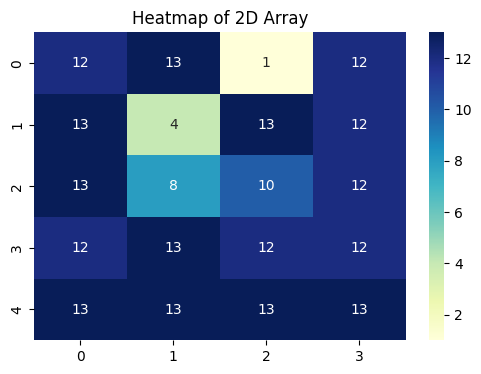

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your 2D array
data = [
    [12, 13, 1, 12],
    [13, 4, 13, 12],
    [13, 8, 10, 12],
    [12, 13, 12, 12],
    [13, 13, 13, 13]
]

# Create the heatmap
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
sns.heatmap(data, annot=True, cmap="YlGnBu", cbar=True)  # annot=True adds values on the heatmap

# Add title (optional)
plt.title('Heatmap of 2D Array')

# Display the heatmap
plt.show()


In [2]:
a = "abc"
b = [i for i in a]
a, b, a == b

('abc', ['a', 'b', 'c'], False)

In [18]:
# Binary Search

def binary_search(arr, target):
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = (left + right) // 2  # Find the middle index
        print(left, right, mid)

        # print(mid, left, right)
        if arr[mid] == target:
            return mid  # Return the index where the target is found
        elif arr[mid] < target:
            left = mid + 1  # Search in the right half
        else:
            right = mid - 1  # Search in the left half
    print(left, right, mid)
    return -1  # Return -1 if the target is not found

# Example usage
arr = [1, 3, 5, 7, 9, 11, 13, 15, 17]
target = 8
result = binary_search(arr, target)

if result != -1:
    print(f"Target found at index {result}")
else:
    print("Target not found")

0 8 4
0 3 1
2 3 2
3 3 3
4 3 3
Target not found


In [19]:
def binary_search(arr, target):
    left, right = 0, len(arr) -1
    
    while left <= right:
        mid = right + left //2
        print(left, right, mid)

        if arr[mid] == target:
            return mid
        elif arr[mid] > target:
            right = mid -1
        else:
            left = mid + 1
    print(left, right, mid)
    return -1

# Example usage
arr = [1, 3, 5, 7, 9, 11, 13, 15, 17]
target = 8
result = binary_search(arr, target)

if result != -1:
    print(f"Target found at index {result}")
else:
    print("Target not found")

0 8 8
0 7 7
0 6 6
0 5 5
0 4 4
0 3 3
4 3 3
Target not found


In [8]:
# Default: Returns one index greater than the target if target is not found
def _find_position(lst, pos):
    
    left, right = 0, len(lst)
    
    while left < right:
        mid = (left + right) // 2
        mid_pos = lst[mid]
        
        if mid_pos == pos:
            return mid
        elif mid_pos < pos:
            left = mid + 1
        else:
            right = mid
    
    return left # Equal or greater

# Returns one index less than the target if target is not found
def _find_position(lst, pos):
    left, right = 0, len(lst)
    result = -1  # Initialize result as -1 (no element less than `pos` by default)
    
    while left < right:
        mid = (left + right) // 2
        mid_pos = lst[mid]
        
        if mid_pos < pos:
            result = mid  # Found a valid index
            left = mid + 1  # Continue searching to the right
        else:
            right = mid  # Search left for smaller values
    
    return result


In [9]:
lst = [1, 3, 5, 7, 9]
pos = 10
_find_position(lst, pos)

4